# Изучение закономерностей, определяющих успешность игр

***Описание проекта:*** 

По заказу интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). проведём исследование. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

***Описание данных:***

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

***Особенности данных:***

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***План работы над проектом:***

1. Знакомство с данными;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Портрет пользователя каждого региона;
5. Проверка гипотез; 
6. Вывод.

## Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from scipy import stats as st

# warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize': (10,7)})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

        Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.81360

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14162,Tour de France 2014,PS4,2014.0,Sports,0.00,0.03,0.00,0.0,53.0,5.1,E
10543,Daito Giken Koushiki Pachi-Slot Simulator: Hih...,DS,2007.0,Misc,0.00,0.00,0.10,0.0,NaN,NaN,NaN
14384,Chicken Shoot 2,GBA,2005.0,Adventure,0.02,0.01,0.00,0.0,NaN,tbd,E10+
949,Rayman Raving Rabbids 2,Wii,2007.0,Misc,0.82,0.82,0.00,0.2,67.0,8.3,E10+
3009,Taiko no Tatsujin Wii,Wii,2008.0,Misc,0.00,0.00,0.67,0.0,NaN,NaN,NaN


Количество пропусков в таблице:

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64 

Количество дубликатов в таблице: 0


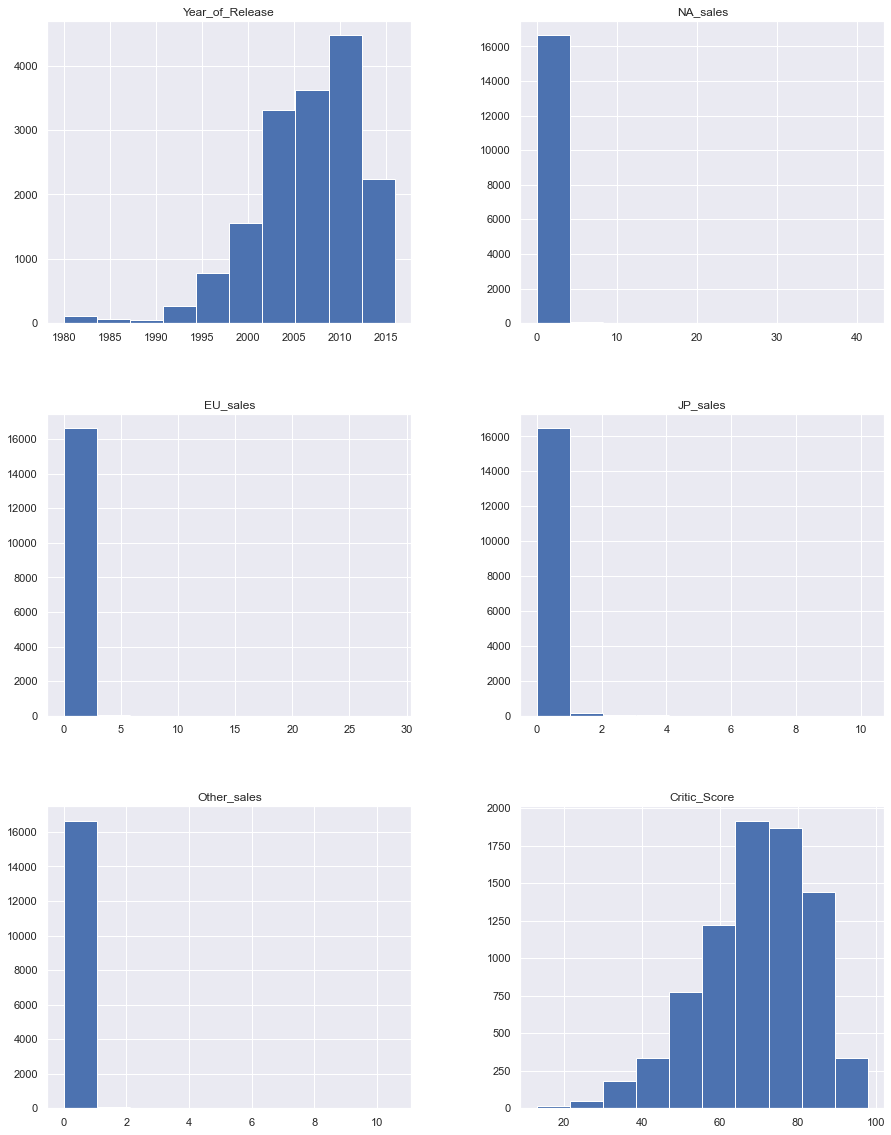

In [2]:
data = pd.read_csv('games.csv')
data.info()
print('\n',data.describe())
display(data.sample(5))
print('Количество пропусков в таблице:\n')
print(data.isna().sum(), '\n')
print('Количество дубликатов в таблице:',  data.duplicated().sum())
data.hist(figsize=(15, 20));

## Предобработка данных

Исправим название столбцов таблицы, приведя их к общему виду. Стандартизируем.

In [3]:
data.columns = map(str.lower, data.columns)

Рассмотрим каждый столбец. Найдём и удалим аномальные значения. По возможности заполним пропуски и сменим тип столбца на более подходящий.

Столбец `name` — название игры. 

In [4]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Восстановить названия не получится. Удалим строки из таблицы.

In [5]:
data = data[~data['name'].isna()]

Столбец `platform` — платформа.

In [6]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Всё хорошо. Пропусков нет. Неявных дубликатов так же нет. (Но консультация с опытным геймером (специалистом) не помешала бы)))

Столбец `year_of_release` — год выпуска.

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: year_of_release, dtype: float64

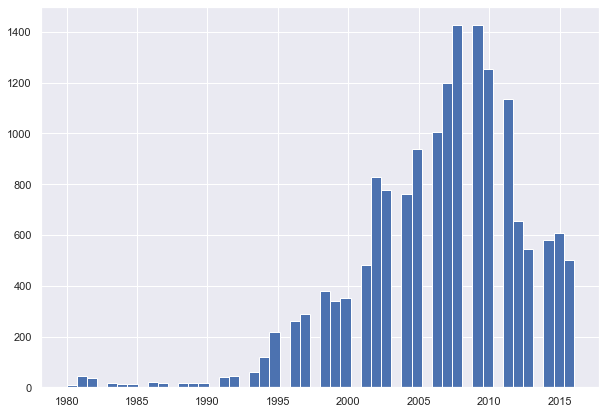

In [7]:
data['year_of_release'].hist(bins=50);
data['year_of_release'].head()

Аномальных значений нет. Мы изменим тип столбца на целочисленный. Нет особого смысла менять тип на дату, так как столбец содержить только значение года. Так же в столбце `269` пропусков. Мы не можем их заполнить, но и не будем удалять из таблицы так как все остальные данные на месте и помогут нам в дальнейших рассчётах.


In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Столбец `genre` — жанр игры.

In [9]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Неявных дубликатов нет, а `2` пропуска, что было изначально, ушли с удалёнными строками где не было имени игры.

Столбец `na_sales` — продажи в Северной Америке (миллионы проданных копий).

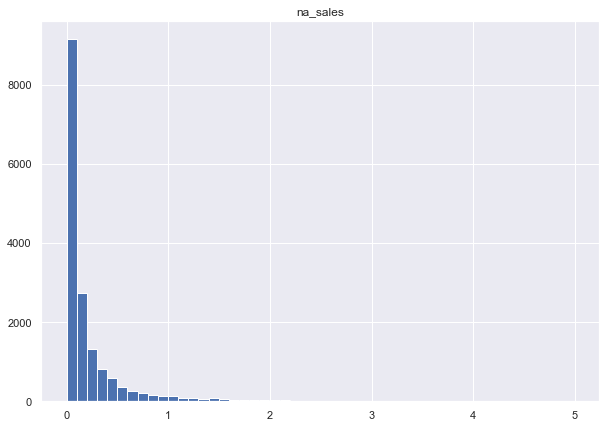

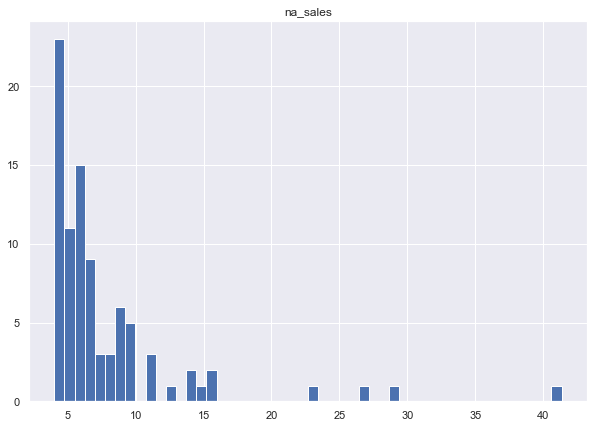

In [10]:
data.query('na_sales < 5').hist('na_sales', bins=50);
data.query('na_sales > 4').hist('na_sales', bins=50);

In [11]:
# data.query('na_sales > 10')['na_sales'].count()

Пропусков нет. Но наблюдаяются выдающиеся значения. Но мы не станем их удалять, так как это важные характеристикой игровой индустрии.

In [12]:
# data = data.loc[data['na_sales'] < 10]

Столбец `eu_sales` — продажи в Европе (миллионы проданных копий).

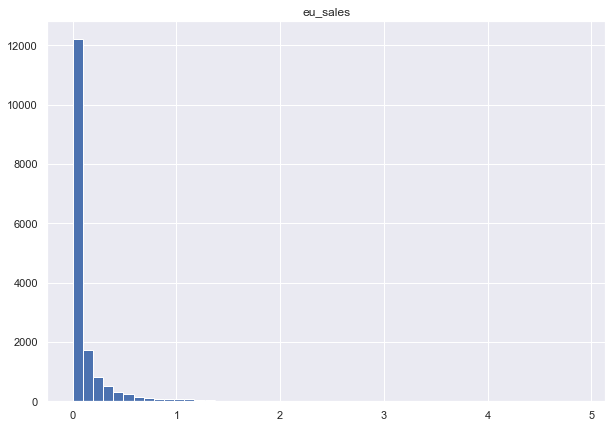

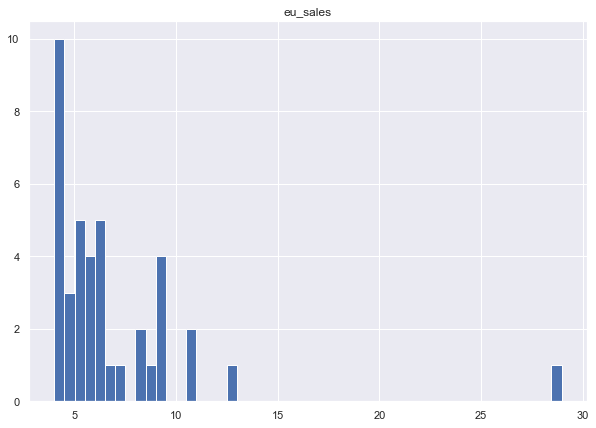

In [13]:
data.query('eu_sales < 5').hist('eu_sales', bins=50);
data.query('eu_sales > 4').hist('eu_sales', bins=50);

In [14]:
# data.query('eu_sales > 6')['na_sales'].count()

Пропусков нет. Но наблюдаяются выдающиеся значения. Так же не будем их удалять.

In [15]:
# data = data.loc[data['eu_sales'] < 6]

Столбец `jp_sales` — продажи в Японии (миллионы проданных копий).

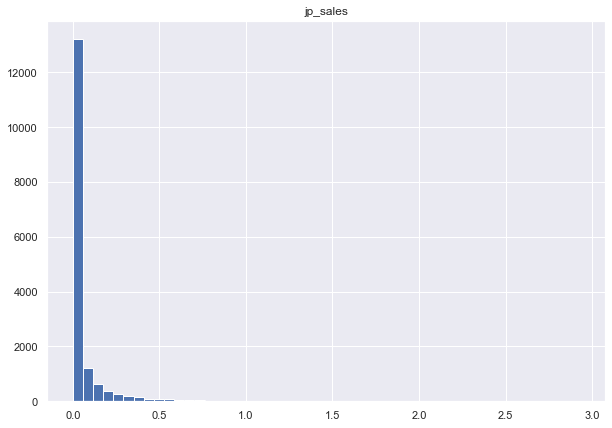

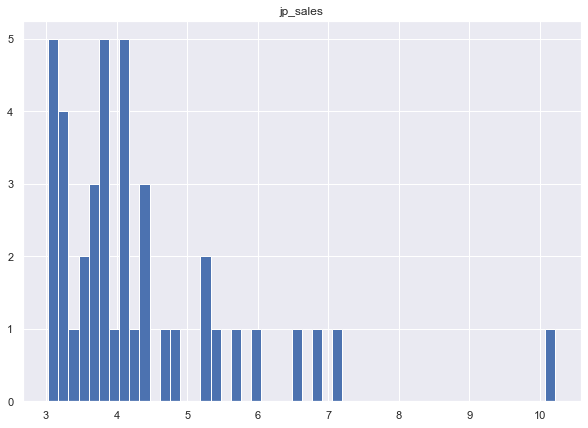

In [16]:
data.query('jp_sales < 3').hist('jp_sales', bins=50);
data.query('jp_sales > 3').hist('jp_sales', bins=50);

Пропусков так же нет.

In [17]:
# data.query('jp_sales > 5')['jp_sales'].count()

In [18]:
# data = data.loc[data['jp_sales'] < 5]

Столбец `other_sales` — продажи в других странах (миллионы проданных копий).

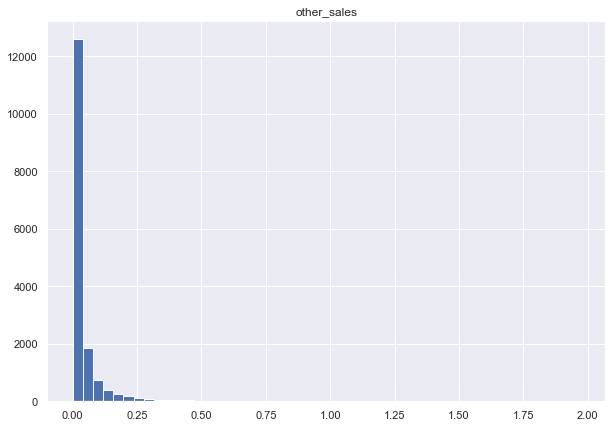

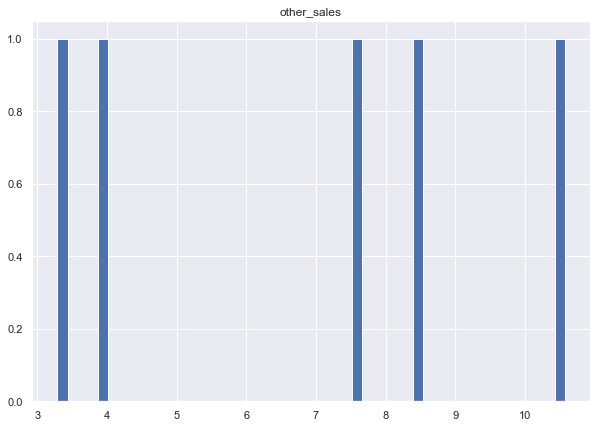

In [19]:
data.query('other_sales < 2').hist('other_sales', bins=50);
data.query('other_sales > 3').hist('other_sales', bins=50);

In [20]:
# data.query('other_sales > 1')['other_sales'].count()

Пропусков нет.

In [21]:
# data = data.loc[data['other_sales'] < 1]

Столбец `critic_score` — оценка критиков (максимум 100).

In [22]:
data['critic_score'].isna().sum()

8576

В столбце `8576` пропусков. Заполним только часть из них средним. Обработаем только те игры, что вышли на разных платформах, но не все из них имеют оценку критиков. Округлим значения средних до челых и сменим тип столбца на целочисленный.

In [23]:
data['critic_score'] = data['critic_score'].fillna(data.groupby('name')['critic_score'].transform('mean'))
data['critic_score'] = data['critic_score'].round(0)
data['critic_score'].isna().sum()

7615

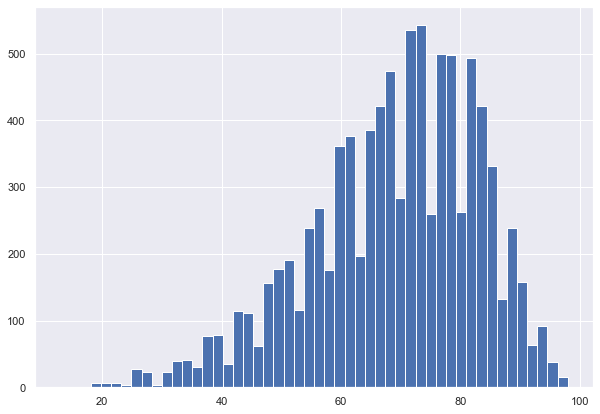

In [24]:
data['critic_score'].hist(bins=50);

Аномальных значений нет и получилось заполнить `961` пропуск.

Столбец `user_score` — оценка пользователей (максимум 10).

In [25]:
print('Пустых значений в столбце:', data['user_score'].isna().sum())
print('tbd значений в столбце:', data[data['user_score'] == 'tbd'].shape[0])

Пустых значений в столбце: 6699
tbd значений в столбце: 2424


В столбце есть значения не числового характера `2424` штуки. tbd - To Be Determined, то есть "Будет определено". Мы заполним пустые значения так же как с оценкой от критиков. Округлим до десятых. И для успешной операции, сменим тип столбца с object на float. В процессе значения tbd будут заменены на NAN.

In [26]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

data['user_score'] = data['user_score'].fillna(data.groupby('name')['user_score'].transform('mean')).round(2)
data['user_score'].isna().sum()

8024

Как итог наших манипуляций - мы "наплодили" дополнительных `2424` пустых значений, но заполнили `1099` ячеек средним. 

In [27]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [28]:
print('Пустых значений в столбце:', data['rating'].isna().sum())

Пустых значений в столбце: 6764


Есть неявные дубликаты. `Е` и `К-А`, `EC`. (`К-А` или `EC` - это предыдущие названия `Е`). Привеведём значения к `Е`. Пропусков очень много. Возможно это потому, что много игры были выпущены в разных странах, а компания ESRB это больше по Америке и Канаде. Поэтому просто заменим пустые значения на `unknown`.

In [29]:
data.loc[(data['rating'] == 'K-A') | (data['rating'] == 'EC'), 'rating'] = 'E'

In [30]:
data.loc[data['rating'].isna(), 'rating'] = 'unknown'

И в конце подготовки данных посчитаем все продажи в отдельный столбец all_sales.

In [31]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

**Вывод: 
Мы подготовили данные для дальнейшего анализа. В ходе подготовки мы:**
- переименовали столбцы таблицы, выявили `269` пропусков в столбце `year_of_release`. Мы не можем из заполнить, но и не стали удалять, чтобы не потерять важные данные, которые ещё хранятся в этих строках. 
- нам пришлось удалить `2` строки, где не было указано название игры.
- в столбцах `critic_score` и `user_score` заполнили возможное количество пропусков. А так же нашли неявные дубликаты в стобце `rating` и исправили
- в том же столбце `rating` заполнили пропуски на `unknown`. Пропусков очень много. Возможно это потому, что много игры были выпущены в разных странах, а компания ESRB это больше по Америке и Канаде.

## Исследовательский анализ данных

После того как подготовили данные рассмотрим каждый столбц в таблице и по возможности составим гистограммы.

Первый столбец name. В нём представленно `16626 `позиций. Но некоторые повторяются. Это игры, которые были выпущены на разных платформах. Сильнее всего в этом плане отличилась `Need for Speed: Most Wanted`. Целых `12` платформ. Видимо настоящий шедевр индустрии. 

In [32]:
print('Количество строк с названиями игр:', data['name'].count())
data['name'].value_counts().head(10)

Количество строк с названиями игр: 16713


Need for Speed: Most Wanted     12
Ratatouille                      9
LEGO Marvel Super Heroes         9
FIFA 14                          9
Madden NFL 07                    9
LEGO The Hobbit                  8
FIFA Soccer 13                   8
Terraria                         8
LEGO Harry Potter: Years 5-7     8
Monopoly                         8
Name: name, dtype: int64

Платформ представленно `31`. Все очень разные. Как по полулярности так и по количеству выпущеных на них игр. Лидируют `2` устройства. Это `DS` и `PS2`. График построен на убывание и те платформы, что в конце списка не имеют даже видимых баров. На столько мало игр, относительно лидеров, было выпущено для них.

Количество платформ: 31


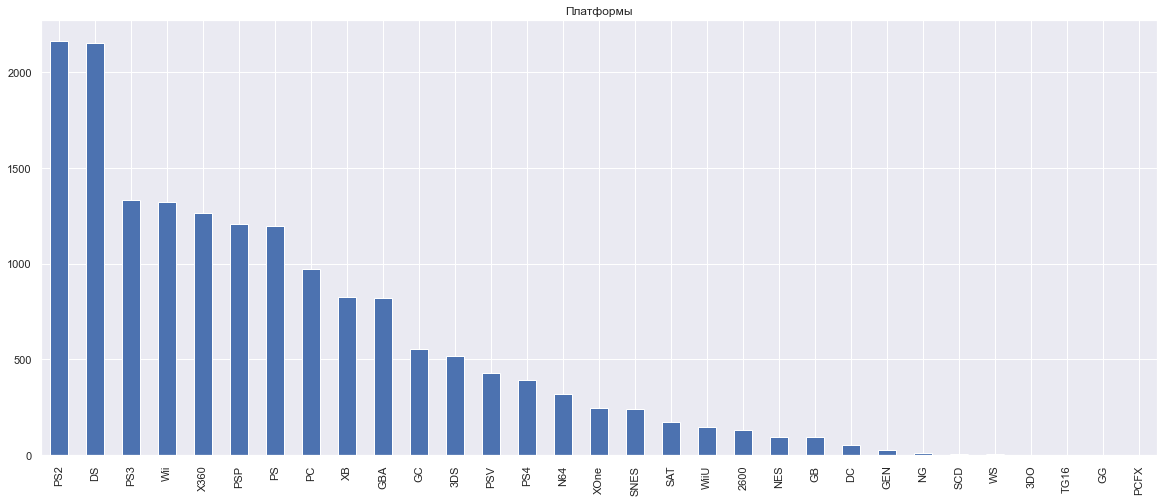

In [33]:
print('Количество платформ:', data['platform'].value_counts().count())
data['platform'].value_counts().plot.bar(figsize=(20, 8)).set_title('Платформы');

По годам выпуска игр можно выделить `2008-2012` годы. Самые плодотворные времена. Потом количество выпускаемых игр резко сократилось. 

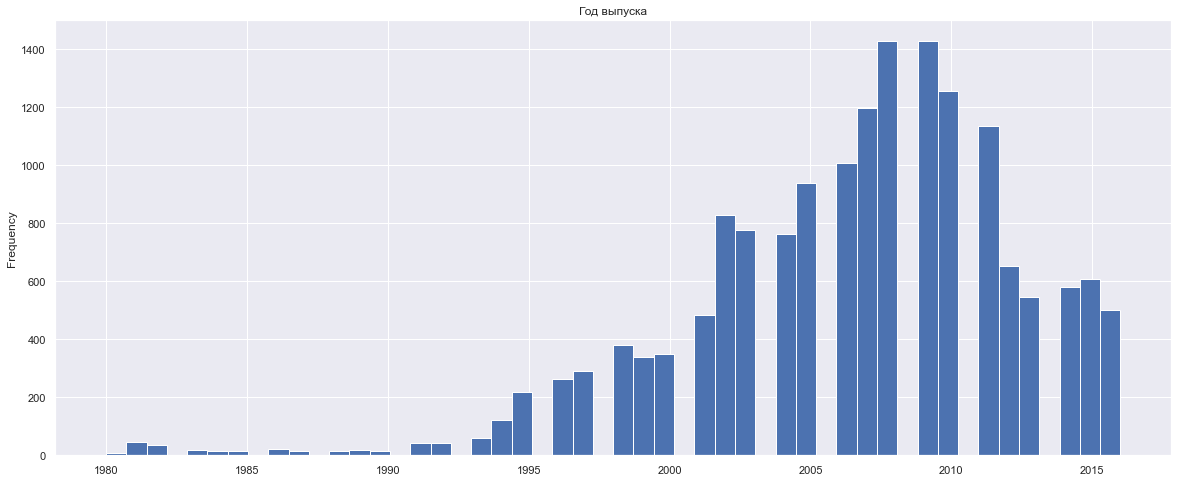

In [34]:
data['year_of_release'].plot(kind='hist', bins=50, figsize=(20, 8)).set_title('Год выпуска');

Игры представленны в разных жанрах. Их можно насчитать `12`. Самый полулярный на фоне остальных это Actoin. На вотром месте игры спортивной тематики (`Sports`). Самый узкий жанр это `Puzzle`. 

Количество жанров: 12


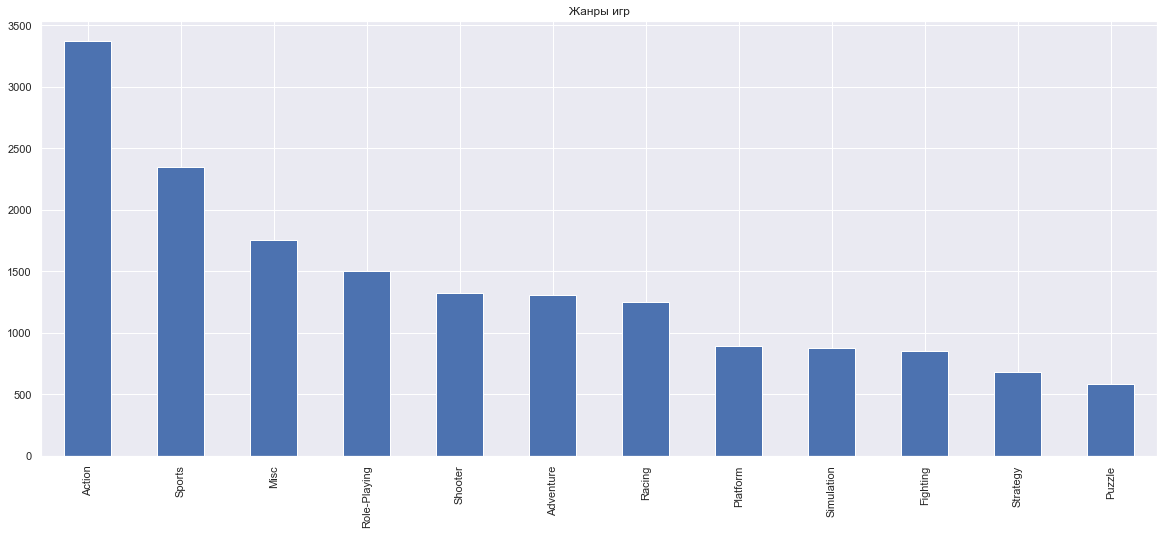

In [35]:
print('Количество жанров:', data['genre'].value_counts().count())
data['genre'].value_counts().plot.bar(figsize=(20, 8)).set_title('Жанры игр');

Что касается продаж игр в Северной Америке, то основная их часть было продана до `200` тысяч копий. Дальше идёт тренд на понижение, но игры в этом промежутке более продаваемы.

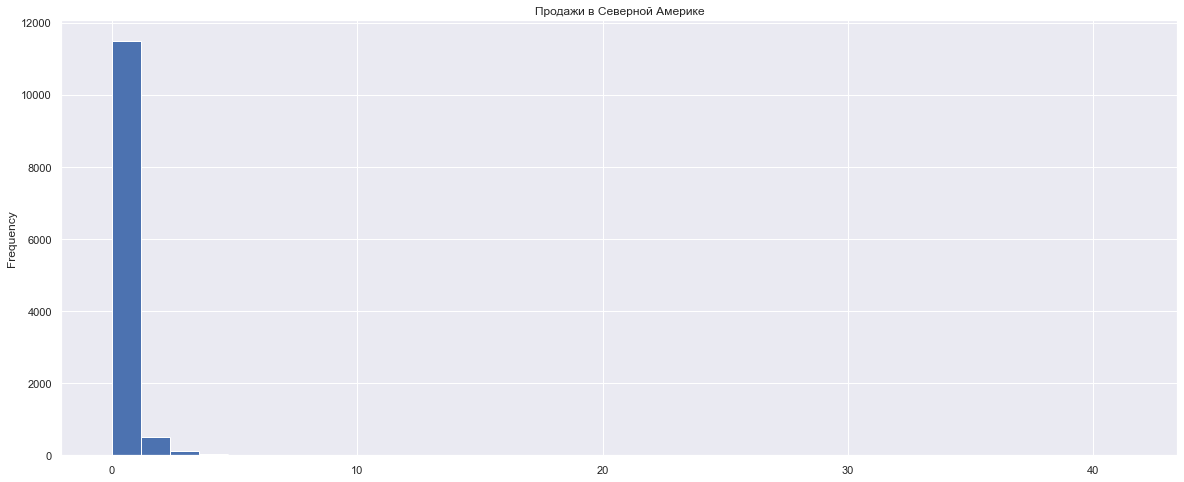

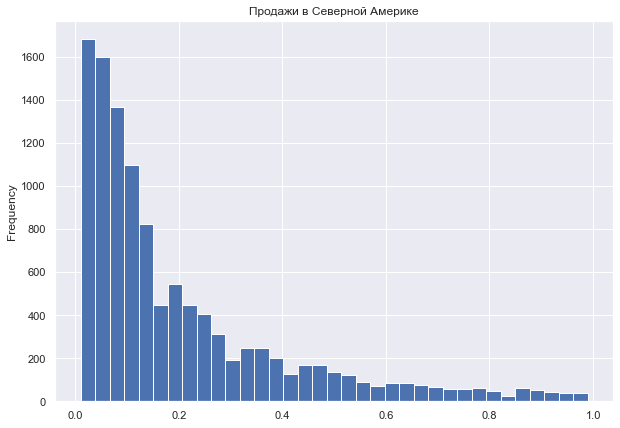

In [36]:
data.query('na_sales != 0')['na_sales'].plot(kind='hist', bins=35, figsize=(20, 8))\
    .set_title('Продажи в Северной Америке');
plt.show()

data.query('na_sales != 0 and na_sales < 1')['na_sales'].plot(kind='hist', bins=35)\
    .set_title('Продажи в Северной Америке');

Такая же ситуация наблюдается и на продажах Европы. Основная часть игр была продана до `180` тысяч копий.

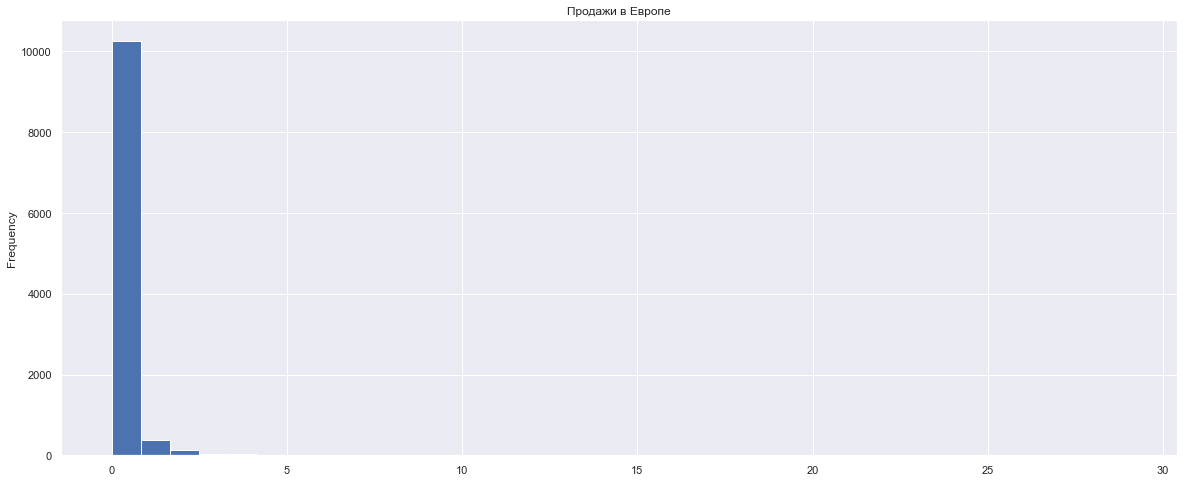

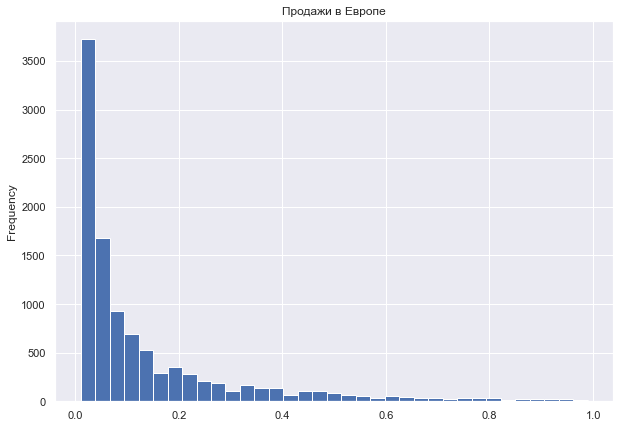

In [37]:
data.query('eu_sales != 0')['eu_sales'].plot(kind='hist', bins=35, figsize=(20, 8))\
    .set_title('Продажи в Европе');
plt.show()

data.query('eu_sales != 0 and eu_sales < 1')['eu_sales'].plot(kind='hist', bins=35)\
    .set_title('Продажи в Европе');

А рынок Японии приктически повторяет тренд Европпы. Сложно найти видимые отличия.

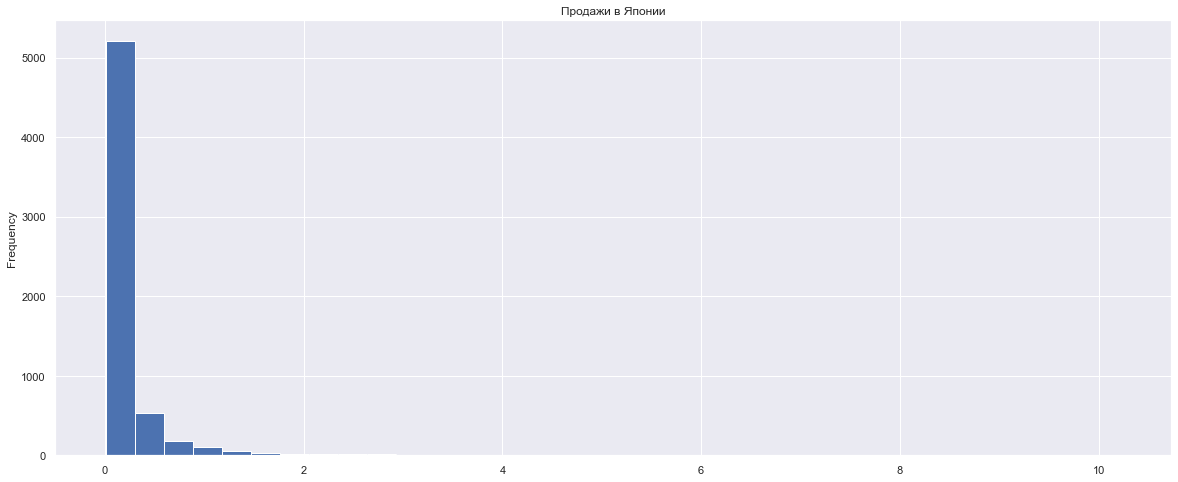

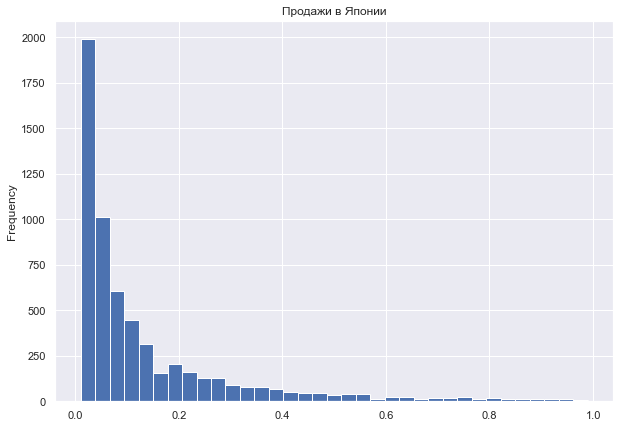

In [38]:
data.query('jp_sales != 0')['jp_sales'].plot(kind='hist', bins=35, figsize=(20, 8))\
    .set_title('Продажи в Японии');
plt.show()

data.query('jp_sales != 0 and jp_sales < 1')['jp_sales'].plot(kind='hist', bins=35)\
    .set_title('Продажи в Японии');

Что касается продаж в других странах, то всё стабильно как в графике Европы и Японии.

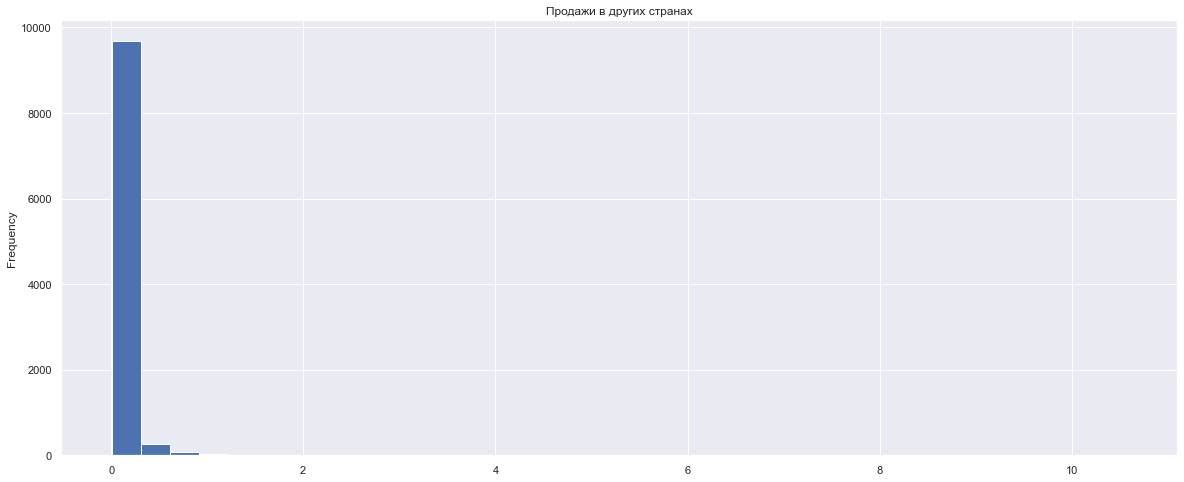

In [39]:
data.query('other_sales != 0')['other_sales'].plot(kind='hist', bins=35, figsize=(20, 8))\
    .set_title('Продажи в других странах');

Оценка критиков представлена в таблице в основном оценкой `70`. И тренд резко падает после 85. Видимо нужно очень постараться, чтобы попасть в этот промежуток.

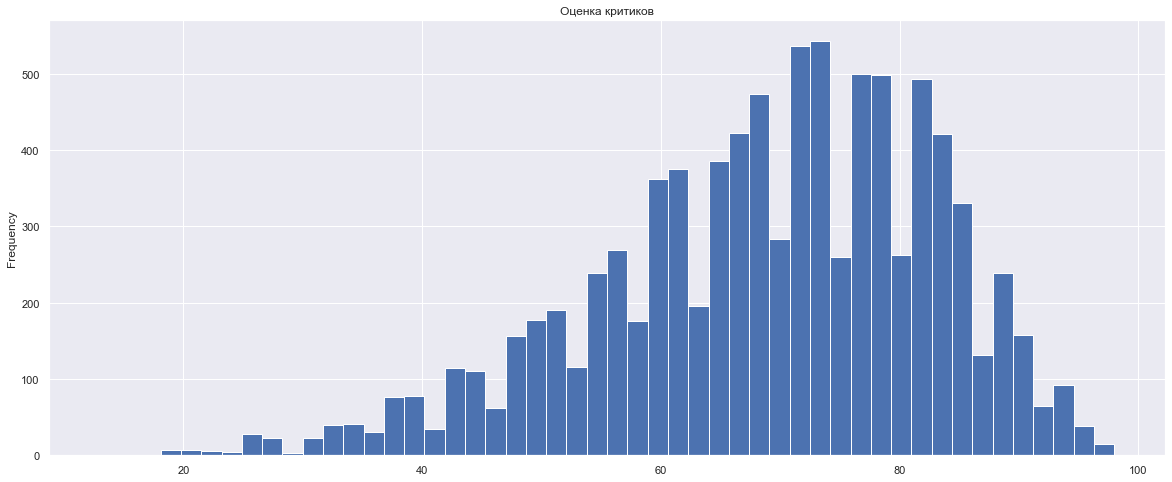

In [40]:
data['critic_score'].plot(kind='hist', bins=50, figsize=(20, 8)).set_title('Оценка критиков');

Игроки в сою очередь немного благосклонней. Пик находится гораздо ближе к очеке `8` баллов. И практически нет оченок в районе `10` баллов.

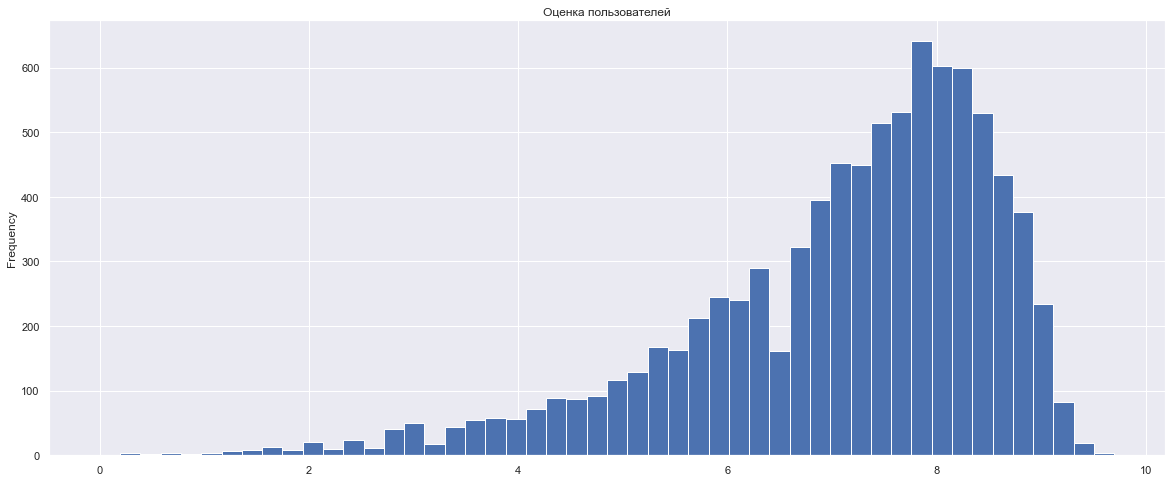

In [41]:
data['user_score'].plot(kind='hist', bins=50, figsize=(20, 8)).set_title('Оценка пользователей');

Посмотрим на рейтинг игр от компании `ESRB`. `7` категорий. Очень много игр не имеют рейтинга, но из тех, что имеют самая популярная это `E - «Для всех»`. И минимальны позиции в категориях `RP, AO`.

Количество видов рейтинга: 7


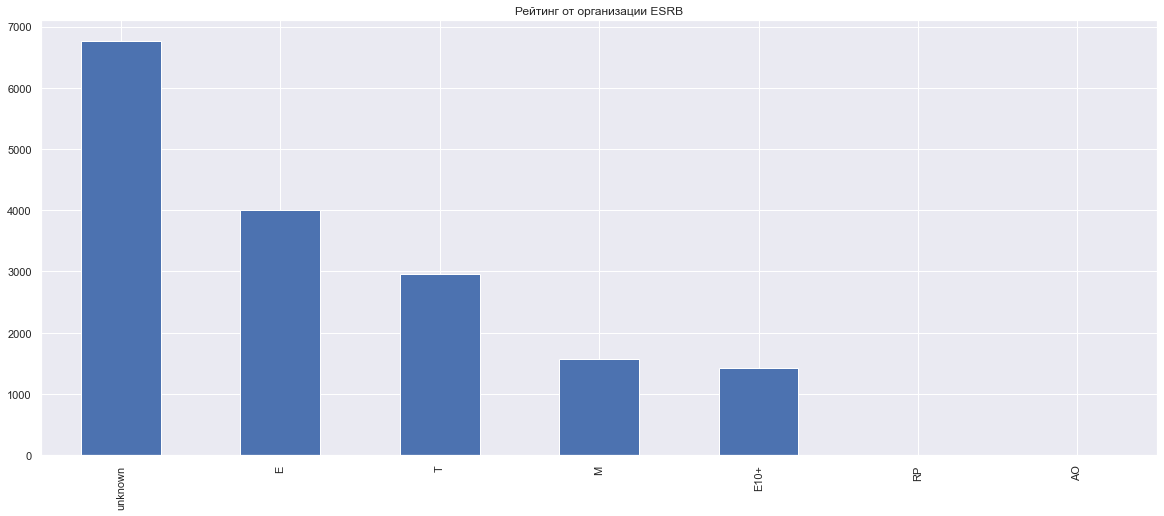

In [42]:
print('Количество видов рейтинга:', data['rating'].value_counts().count())
data['rating'].value_counts().plot.bar(figsize=(20, 8)).set_title('Рейтинг от организации ESRB');

После детального рассмотрения таблицы вернёмся к ТЗ и приступим к рассчетам. (для ревьера: я почему-то подумал, чтот "этап детального рассмотрения" входит в процесс общего исследования. Я имею ввиду, при каждом новом исследовании новых данных в любой сфере. Только когда вчитался в ТЗ понял, что это можно было не делать это вовсе. И или вообще я ошибаюсь и этот этап не обязательный впринципе в любом новом исследовании если того не требует ТЗ.) 

Итак, по графику мы видим нечто на зарождение индустрии и к каким масштабам это привело. Для наших текущих исследований будет достаточно какого-то определённого периода. Как раз мы можем видео по графику, что есть период, когда пришёлся пик и спад активности в индустрии.

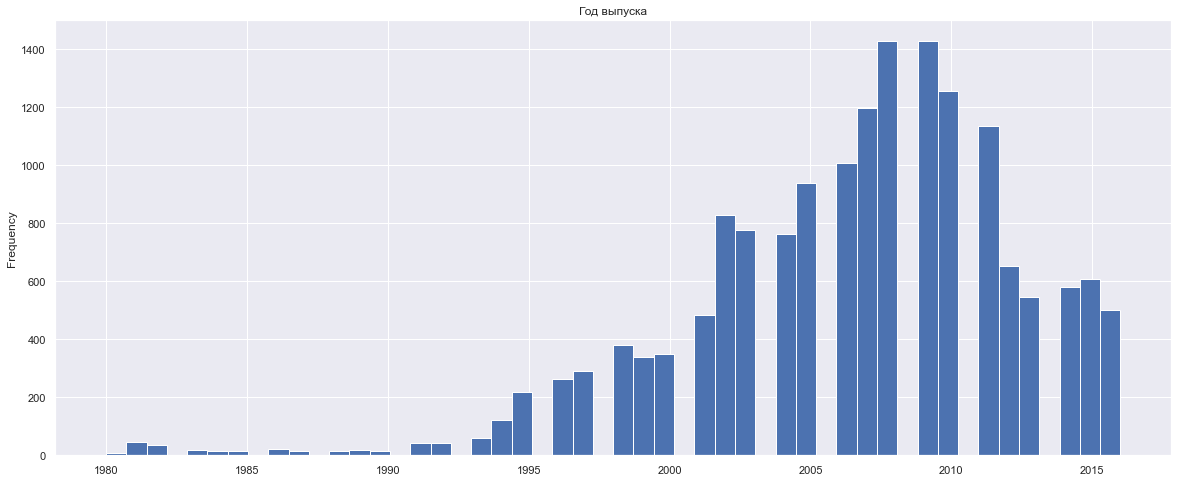

In [43]:
data['year_of_release'].plot(kind='hist', bins=50, figsize=(20, 8)).set_title('Год выпуска');

Мы построим график, который нам покажет срок появления новых и исчезание старых платформ. Для этого мы найдём сумму проданых игр для каждой платформы и распределим значения по годам.

In [44]:
# возьмём топ-6 платформ по продажам
a = data.pivot_table(index='platform', values='all_sales', aggfunc=['sum'])
a = a.sort_values(by=('sum', 'all_sales'), ascending=False)[:6]

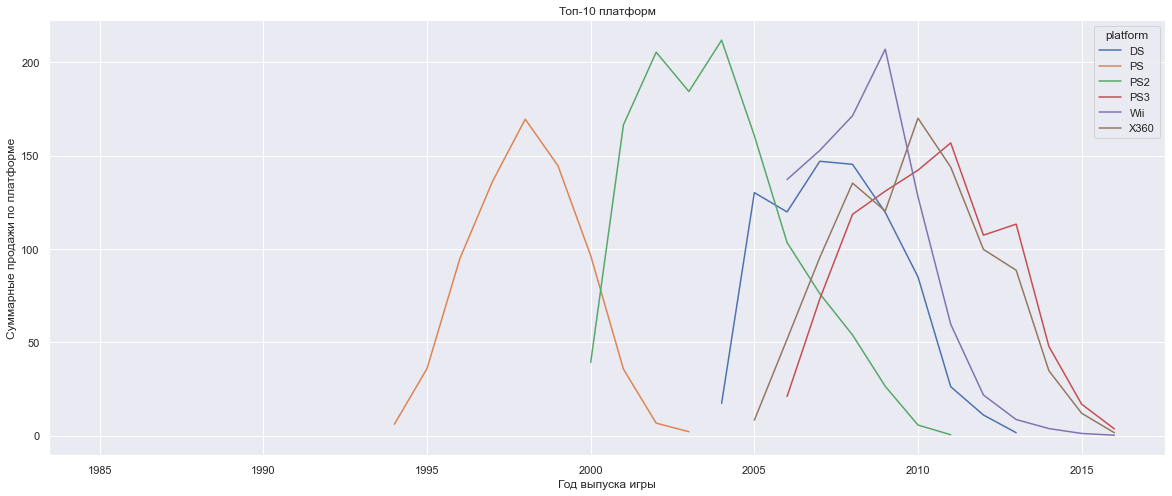

In [45]:
data.query('platform in @a.index').pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')\
.plot(kind='line',\
      style='-',\
      title='Топ-10 платформ',\
      xlabel='Год выпуска игры',\
      ylabel='Суммарные продажи по платформе',\
      grid=True,\
      figsize=(20,8)
);

График нам показывает, что срок жизни платформы в среднем `10` лет. Поэтому мы будем использовать именно такой промежуток для исследования.

In [46]:
# сделаем срез с 2012 года (включительно)
data_crop = data[data['year_of_release'] >= 2012]

Построим новый график по срезу.

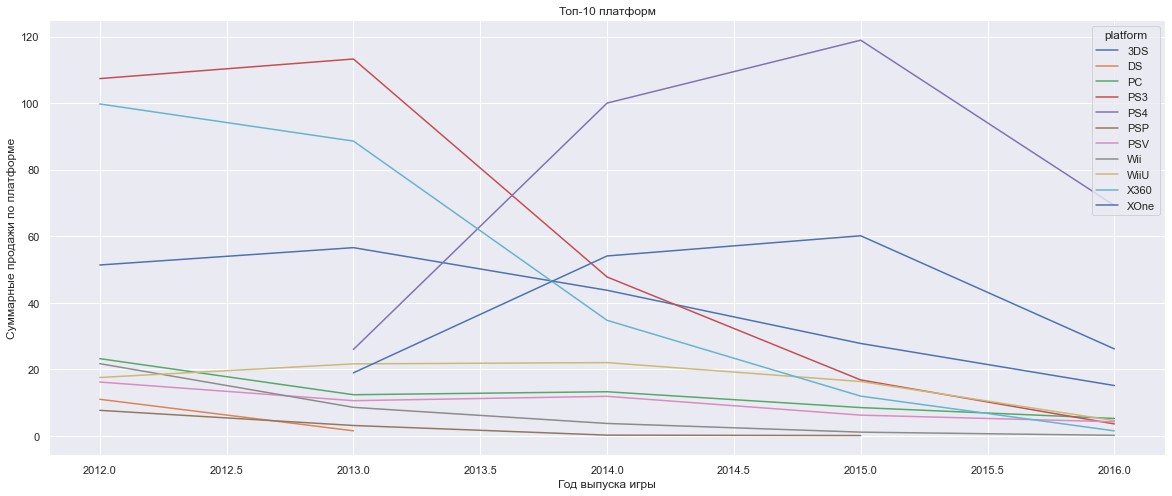

In [47]:
data_crop.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')\
.plot(kind='line',\
      style='-',\
      title='Топ-10 платформ',\
      xlabel='Год выпуска игры',\
      ylabel='Суммарные продажи по платформе',\
      grid=True,\
      figsize=(20,8)
);

Можем выделить несколько платформ, которые выглядят интересно на фоне остальных. Это `PS4, XOne и 3DS`.
- все платформы падают в продажах от своих пиков
- `PS4` имеет на данный момент самые большие продажи за последние `2 года` относительно всех платформ за тот же период
- если искать лидера по пиковым продажам на всём графике, то это всё та же `PS4`. Пока на данный момент самая перспективная платформа.
- не много уступает по пиковым продажам `PS3`, но на текущий момент она практичесики не активна на рынке. Большего внимания заслудивает `XOne`, который практически дублирует график `PS4`, но на порядок ниже


Построим график по глобальным продажам игр в разбивке по платформам.

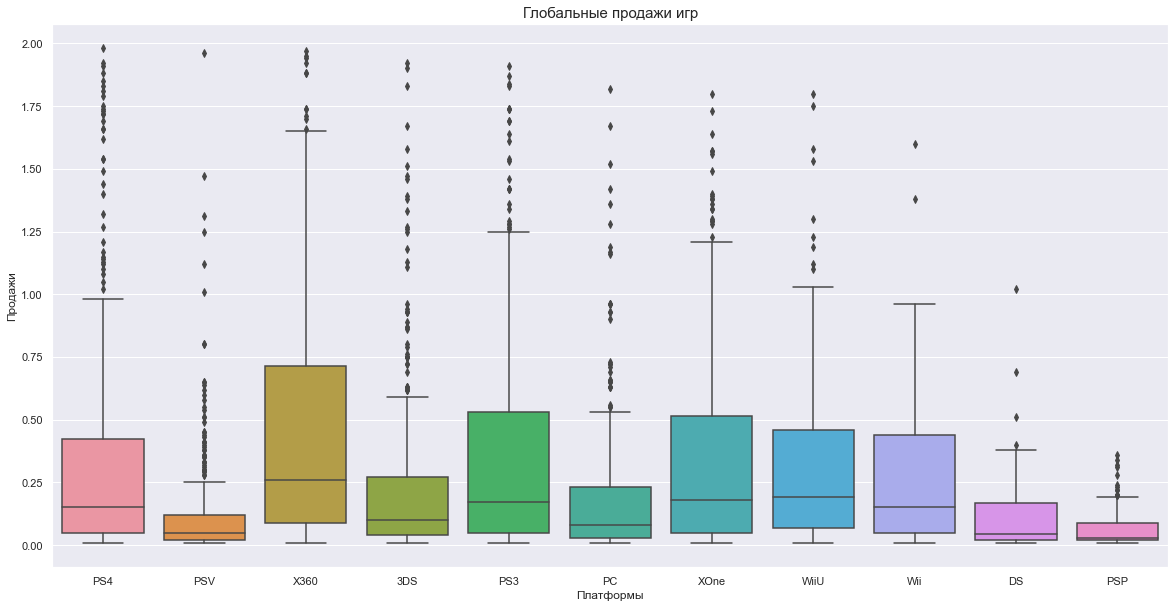

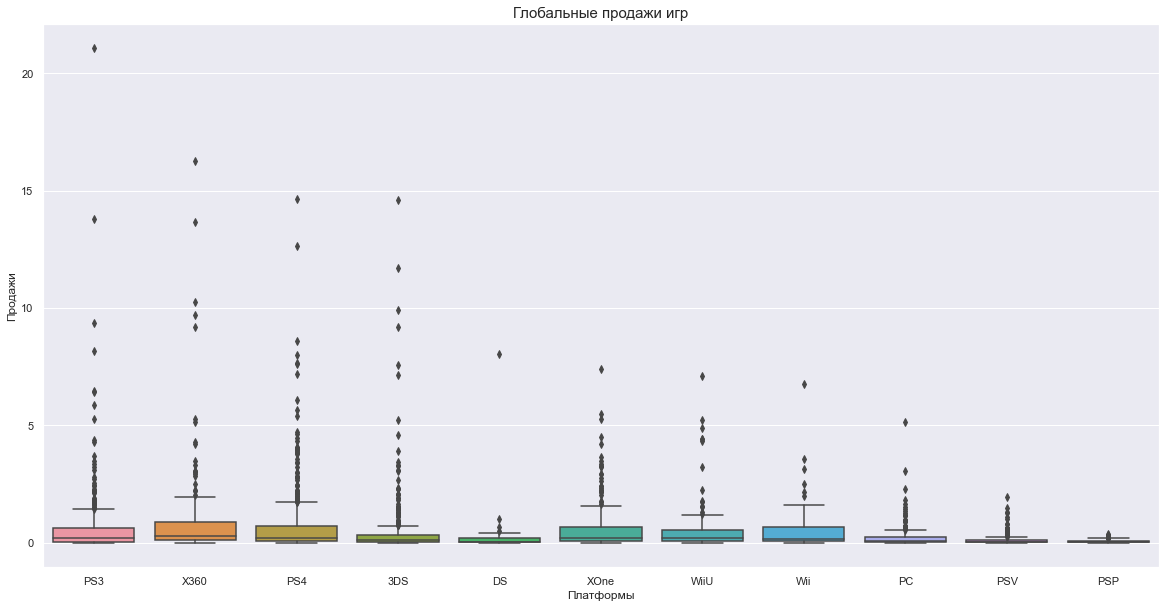

In [48]:
sns.set(rc={"figure.figsize":(20, 10)})

# строим график для оценки квартилей по платформам
b = data_crop.query('all_sales < 2')
sns.boxplot(y=b['all_sales'], x=b['platform']);
plt.xlabel('Платформы', fontsize= 12)
plt.ylabel('Продажи', fontsize= 12)
plt.title('Глобальные продажи игр', fontsize= 15);
plt.show()
# строим график для оценки выбросов
sns.boxplot(y=data_crop['all_sales'], x=data_crop['platform']);
plt.xlabel('Платформы', fontsize= 12)
plt.ylabel('Продажи', fontsize= 12)
plt.title('Глобальные продажи игр', fontsize= 15);

Смотря на первый график мы видим, что у всех платформ больше продаются не дорогие игры так как медианы у всех расположены значительно ближе к нижнему квартилю. Если смотреть по нашим `3` платформам, которые обладают большим потенциалом, то у `3DS` этот показатель большее выраженнный. Всё таки `PS4` и `XOne` продают игры подороже хоть и не на много. Что касается очень популярных игр, кототые были проданы в больших количествах, то платформы `PS4` и `3DS` лидируют, а `XOne` значительно отстаёт.

Теперь посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмём платформу PS3.

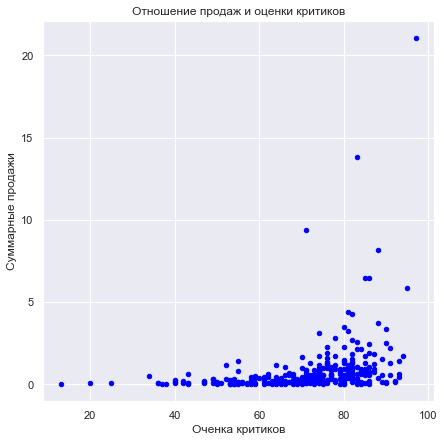

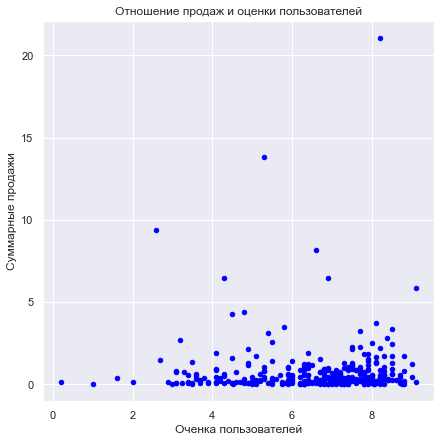

In [49]:
sns.set(rc={"figure.figsize":(7, 7)}) #width=8, height=4
data_crop.query('platform == "PS3"').plot(
    x='critic_score',\
    y='all_sales',\
    title='Отношение продаж и оценки критиков',\
    xlabel='Оченка критиков',\
    ylabel='Суммарные продажи',\
    kind='scatter',\
    grid = True,\
    color='blue'
);
plt.show()

data_crop.query('platform == "PS3"').plot(
    x='user_score',\
    y='all_sales',\
    title='Отношение продаж и оценки пользователей',\
    xlabel='Оченка пользователей',\
    ylabel='Суммарные продажи',\
    kind='scatter',\
    grid = True,\
    color='blue'
);

In [50]:
data_crop.query('platform == "PS3"')['all_sales'].corr(data_crop.query('platform == "PS3"')['critic_score'])

0.3072506040770395

In [51]:
data_crop.query('platform == "PS3"')['all_sales'].corr(data_crop.query('platform == "PS3"')['user_score'])

0.00776383188653805

По графику `Отношение продаж и оценки критиков` мы можем наблюдать, что чем выше оценка была поставлена критиками, тем больше копий игры было куплено игроками. Это видно в районе оценки `80-100` баллов. В то же время оценка от пользователей не так авторитетна у игроков. На графике `Отношение продаж и оценки пользователей` видно, что по всей площади графика много не связных с оценкой продаж. Это же и подтвержадет наличие  положительной слабой связи в `0.31` у критиков и отсутствие какой бы то не было корреляции (`0.01`) у пользателей.

Рассчитаем корреляцию для других `3` платформ. Возьмём `X360, PS4` и `XOne`.

In [52]:
print('Отношение оценки критиков и продаж X360:', data_crop.query('platform == "X360"')['all_sales']\
      .corr(data_crop.query('platform == "X360"')['critic_score']))
print('Отношение оценки пользователей и продаж X360:', data_crop.query('platform == "X360"')['all_sales']\
      .corr(data_crop.query('platform == "X360"')['user_score']))

Отношение оценки критиков и продаж X360: 0.3268732345802404
Отношение оценки пользователей и продаж X360: 0.011513188805697813


In [53]:
print('Отношение оценки критиков и продаж PS4:', data_crop.query('platform == "PS4"')['all_sales']\
      .corr(data_crop.query('platform == "PS4"')['critic_score']))
print('Отношение оценки пользователей и продаж PS4:', data_crop.query('platform == "PS4"')['all_sales']\
      .corr(data_crop.query('platform == "PS4"')['user_score']))

Отношение оценки критиков и продаж PS4: 0.39164371358684935
Отношение оценки пользователей и продаж PS4: -0.02160624005465844


In [54]:
print('Отношение оценки критиков и продаж XOne:', data_crop.query('platform == "XOne"')['all_sales']\
      .corr(data_crop.query('platform == "XOne"')['critic_score']))
print('Отношение оценки пользователей и продаж XOne:', data_crop.query('platform == "XOne"')['all_sales']\
      .corr(data_crop.query('platform == "XOne"')['user_score']))

Отношение оценки критиков и продаж XOne: 0.3741380361174714
Отношение оценки пользователей и продаж XOne: -0.09402414277023065


Примерно подобных значерия корреляции мы получили у этих платформ.

Теперь посмотрим на жанры игр и их количество продаж.

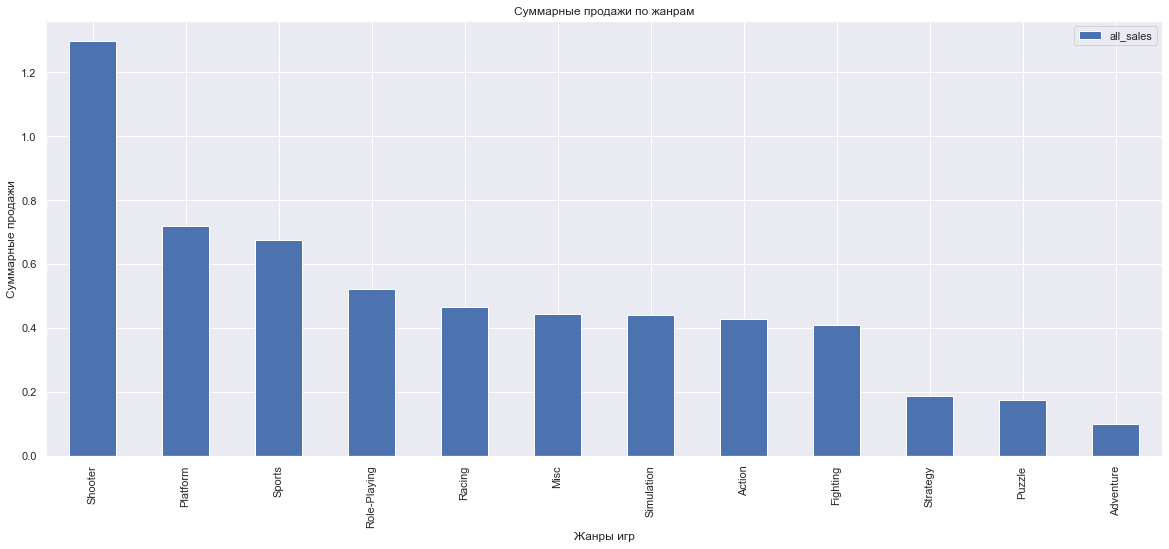

In [55]:
data_crop.pivot_table(index='genre', values='all_sales', aggfunc='mean')\
.sort_values(by=('all_sales'), ascending=False)\
.plot(kind='bar',\
      style='-',\
      title='Суммарные продажи по жанрам',\
      xlabel='Жанры игр',\
      ylabel='Суммарные продажи',\
      grid=True,\
      figsize=(20,8)
);

# 

Явный лидер по продажам это жанр Shooter. На втором месте Platform и совсем не много от него отстаёт жанр Sports. А что касается игр, которые продались меньше всего, то это жанр Puzzle и Adventure. Различие про продажам с лидером в разы.

**Вывод: Мы провели исследовательский анализ и выяснили, что:**
- пик индустрии пришелся на `2008-2012` год
- срок жизни платформы в среднем около `10` лет
- можем выделить несколько платформ, которые выглядят интересно на фоне остальных. Это `PS4, XOne и 3DS`
- все платформы падают в продажах от своих пиков
- `PS4` имеет на данный момент самые большие продажи за последние `2 года` относительно всех платформ за тот же период
- если искать лидера по пиковым продажам на всём графике (за 5 лет), то это всё та же `PS4`. Пока на данный момент самая перспективная платформа из перспективных
- но и она не много уступает по пиковым продажам `PS3`, но `PS3` на текущий момент она практичесики не активна на рынке.
- большего внимания заслудивает `XOne`, который практически дублирует график `PS4`, но на порядок ниже показателями продаж
- так же мы выяснили, что у оценки критиков и количеством проданых копий игры есть положительная слабая связь она значительно сильнее, чем от отношение оценок пользователей. Там отсутствие какой бы то не было корреляции
- явный лидер по продажам это жанр `Shooter`. На втором месте `Platform` и совсем не много от него отстаёт жанр `Sports`. А что касается игр, которые продались меньше всего, то это жанр `Puzzle` и `Adventure`. Различие про продажам с лидером в разы.

## Портрет пользователя каждого региона

Определим портрет пользователя для каждого региона. Начнём с Северной Америки.

C:\Users\ZENNIU~1\AppData\Local\Temp/ipykernel_6224/3912815549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_crop['ESRB_description'] = data_crop['rating'].map(ESRB_dict)


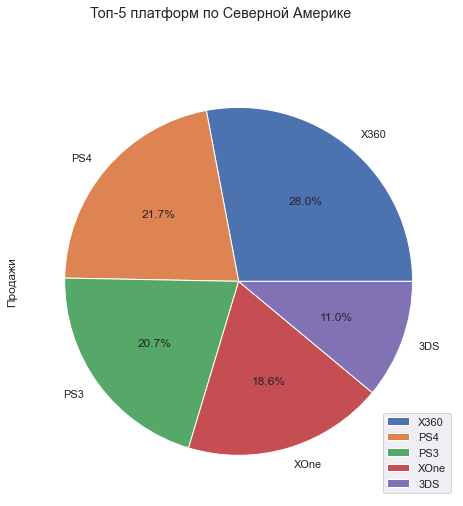

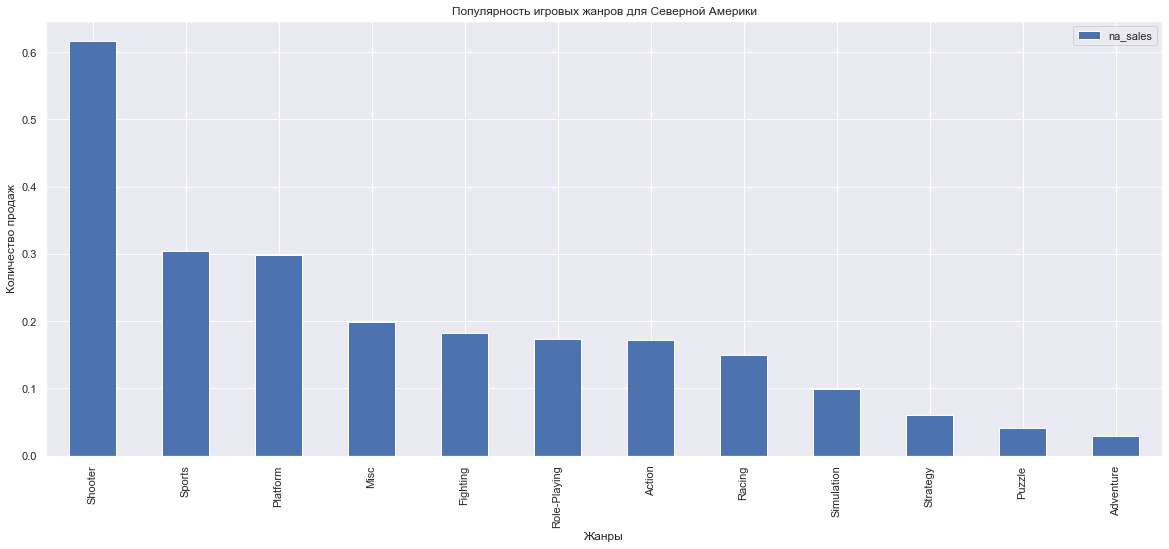

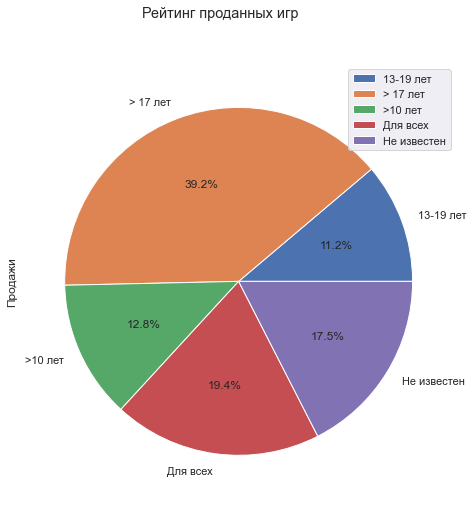

In [56]:
# переведём в пояснительный вид рейтинг игр
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'unknown': 'Не известен'}
data_crop['ESRB_description'] = data_crop['rating'].map(ESRB_dict)

# найдём топ-5 платформ по продажам для Северной Америки и простоим график
data_crop.pivot_table(index='platform', values='na_sales', aggfunc=['sum'])\
.sort_values(by=('sum', 'na_sales'), ascending=False)[:5]\
.plot(kind='pie',\
      style='-',\
      subplots=True,
      title='Топ-5 платформ по Северной Америке',\
      ylabel='Продажи',\
      grid=True,\
      autopct='%1.1f%%',\
      figsize=(20,8)
);
plt.show()

# строим график по жанрам
data_crop.pivot_table(index='genre', values='na_sales', aggfunc='mean')\
.sort_values(by='na_sales', ascending=False)\
.plot(kind='bar',\
      style='-',\
      title='Популярность игровых жанров для Северной Америки',\
      xlabel='Жанры',\
      ylabel='Количество продаж',\
      grid=True,\
      figsize=(20,8)
);
plt.show()

# строим график по рейтингу
data_crop.pivot_table(index='ESRB_description', values='na_sales', aggfunc='sum')\
.plot(kind='pie',\
      style='-',\
      subplots=True,
      title='Рейтинг проданных игр',\
      ylabel='Продажи',\
      grid=True,\
      autopct='%1.1f%%',\
      figsize=(20,8)
);

Пользователь Северной Америки выбирает одну из `5` самых полулярых платформ в регионе. Это `X360, PS4, PS3, XOne, 3DS`. Платформы уже перечислены по популярности. 
- лидер продаж `X360` с `28%` от объёма продаж игр всех представленных лидеров
- на втором месте `PS4` и `PS3` с `~21%` у каждого, но чуть отстаёт от них `XOne` с `18.6%`
- последнее место в рейтинге у `3DS` и `11%` соответственно.

Что касается топ-5 популярных жанров это `Shooter, Sports, Platform, Misc и Fighting`. Игроки любят пострелять - это очевидно.
В Северной Америке большинство продаж игр с рейтингом "до 17 лет" - `39.2%`. На второе место люди предпочли рейтинг "Для всех" и `19.4%`. Неизвестен рейтинг у `17.5%` игр.

Определим портрет пользователя из Европы.

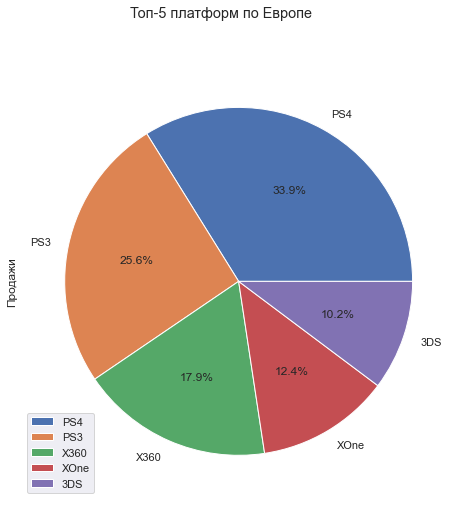

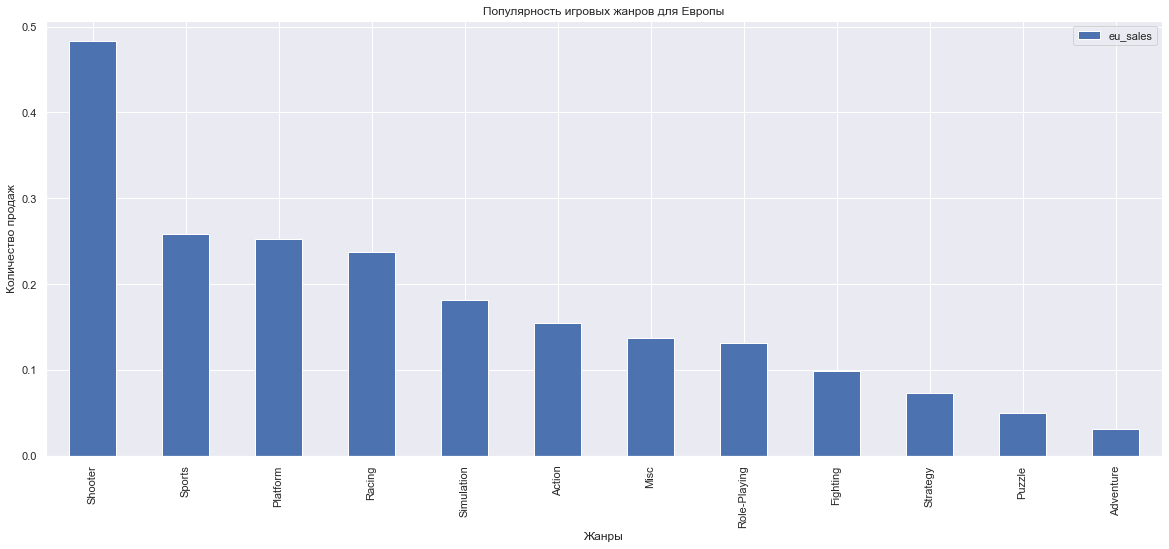

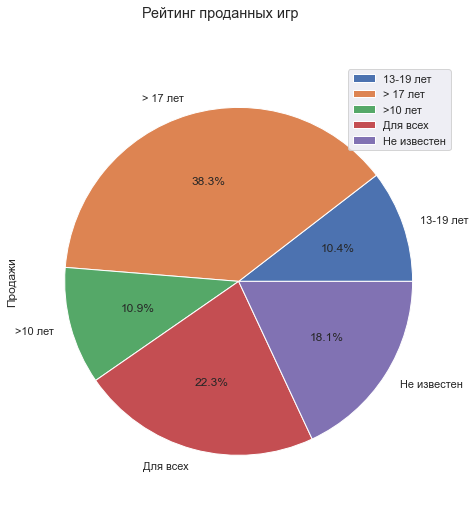

In [57]:
# найдём топ-5 платформ по продажам для Европы и простоим график
data_crop.pivot_table(index='platform', values='eu_sales', aggfunc=['sum'])\
.sort_values(by=('sum', 'eu_sales'), ascending=False)[:5]\
.plot(kind='pie',\
      style='-',\
      subplots=True,
      title='Топ-5 платформ по Европе',\
      ylabel='Продажи',\
      grid=True,\
      autopct='%1.1f%%',\
      figsize=(20,8)
);
plt.show()

# строим график по жанрам
data_crop.pivot_table(index='genre', values='eu_sales', aggfunc='mean')\
.sort_values(by='eu_sales', ascending=False)\
.plot(kind='bar',\
      style='-',\
      title='Популярность игровых жанров для Европы',\
      xlabel='Жанры',\
      ylabel='Количество продаж',\
      grid=True,\
      figsize=(20,8)
);
plt.show()

# строим график по рейтингу
data_crop.pivot_table(index='ESRB_description', values='eu_sales', aggfunc='sum')\
.plot(kind='pie',\
      style='-',\
      subplots=True,
      title='Рейтинг проданных игр',\
      ylabel='Продажи',\
      grid=True,\
      autopct='%1.1f%%',\
      figsize=(20,8)
);

Пользователь Европы выбирает так же одну из `5` самых полулярых платформ в регионе. Это `PS4, PS3, X360, XOne, 3DS`. Платформы уже перечислены по популярности. 
- лидер продаж `PS4` с `33.9%` от объёма продаж игр всех представленных лидеров
- второе место у `PS3` и `25.6%` соответственно
- на последнем месте в рейтинге у `3DS` и `10.2%`.

Что касается топ-5 популярных жанров это `Shooter, Sports, Platform, Racing,` и вырвался немного в перёд и попал в рейтинг `Simulation`. В Европе "любят спорт" так же как в Северной Америке.
По рейтингу в Европе большинство продаж игр с меткой "> 17" - это `38.3%`. На втором месте "игры для всех" c `22.3%`. С неизвестным рейтингим `18.1%`.

Определим портрет пользователя из Японии.

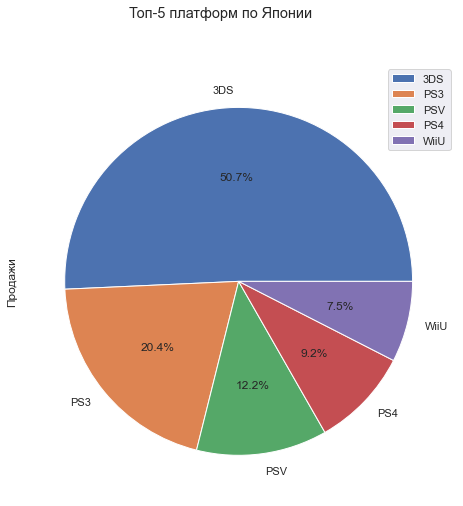

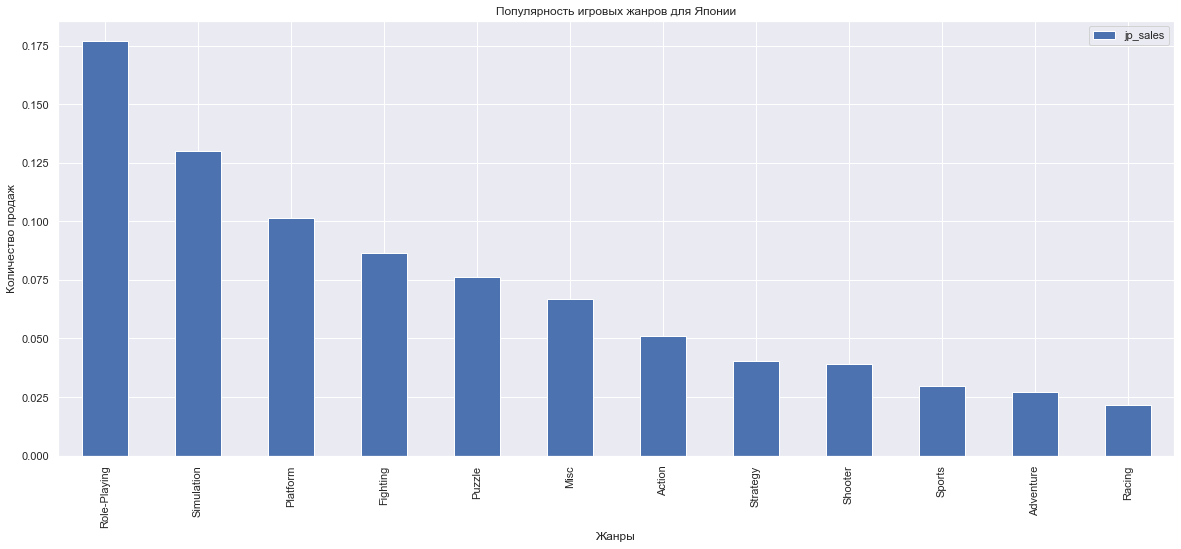

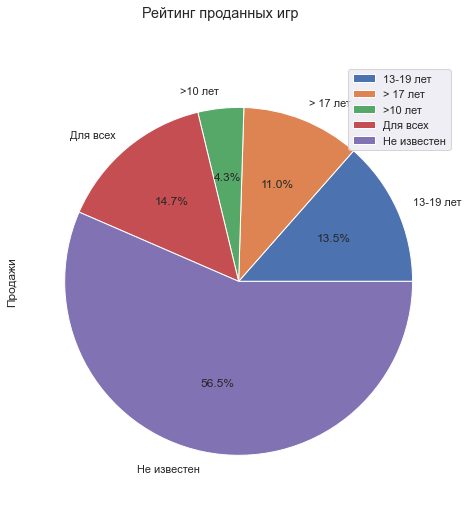

In [58]:
# найдём топ-5 платформ по продажам для Японии и простоим график
data_crop.pivot_table(index='platform', values='jp_sales', aggfunc=['sum'])\
.sort_values(by=('sum', 'jp_sales'), ascending=False)[:5]\
.plot(kind='pie',\
      style='-',\
      subplots=True,
      title='Топ-5 платформ по Японии',\
      ylabel='Продажи',\
      grid=True,\
      autopct='%1.1f%%',\
      figsize=(20,8)
);
plt.show()

# строим график по жанрам
data_crop.pivot_table(index='genre', values='jp_sales', aggfunc='mean')\
.sort_values(by='jp_sales', ascending=False)\
.plot(kind='bar',\
      style='-',\
      title='Популярность игровых жанров для Японии',\
      xlabel='Жанры',\
      ylabel='Количество продаж',\
      grid=True,\
      figsize=(20,8)
);
plt.show()

# строим график по рейтингу
data_crop.pivot_table(index='ESRB_description', values='jp_sales', aggfunc='sum')\
.plot(kind='pie',\
      style='-',\
      subplots=True,
      title='Рейтинг проданных игр',\
      ylabel='Продажи',\
      grid=True,\
      autopct='%1.1f%%',\
      figsize=(20,8)
);

Пользователь в Японии выбирает `5` самых полулярых платформ в регионе. Это `3DS, PS3, PSV, PS4, WiiU`. Платформы уже перечислены по популярности. 
- лидер продаж `3DS` с `50.7%` от объёма продаж игр всех представленных лидеров
- второе место у `PS3` и `20.4%` соответственно
- на последнем месте в рейтинге у `WiiU - 7.5%`.

Что касается топ-5 популярных жанров это `Role-Playing, Simulation, Platform, Fighting, Puzzle`. Топовый жанр `Role-Playing `встречается пока только в Японском сегменте на первом месте.
По рейтингу в Японии большинство продаж игр c неизвестным рейтингом - `56.6%`. На последнем месте игры для детей младше `10` лет - `4.3%`.

Определим портрет пользователя из ДРУГИХ стран.

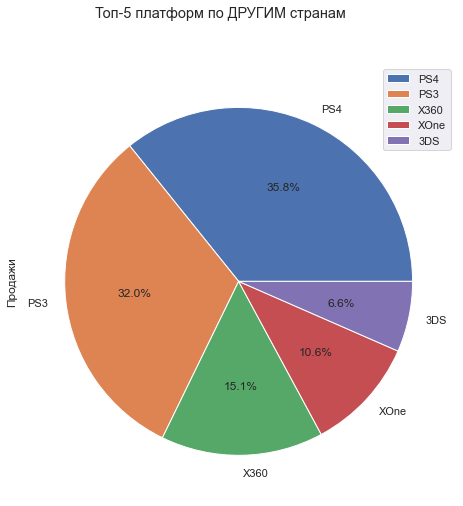

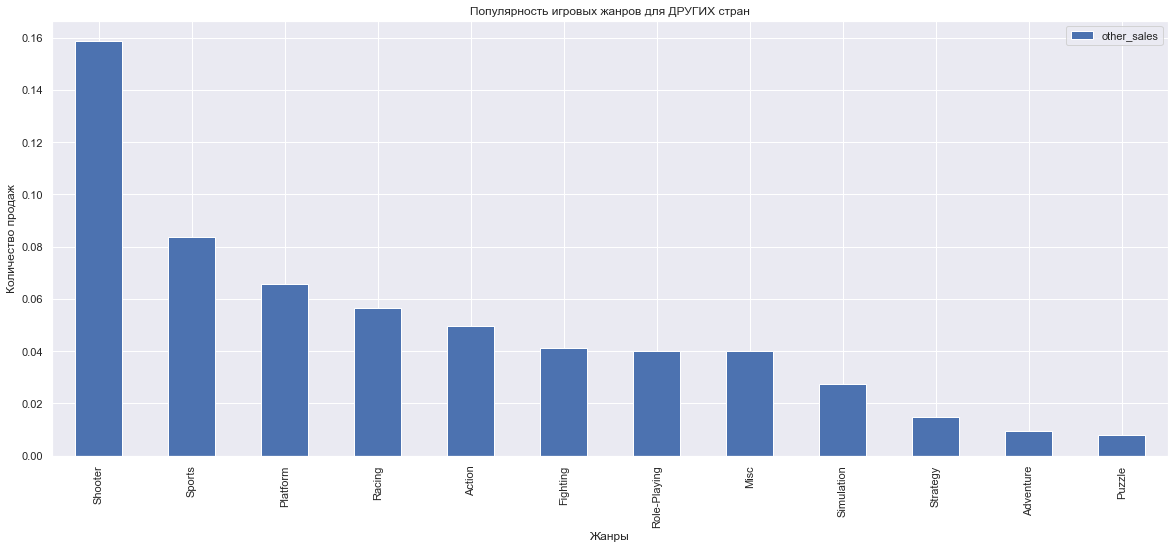

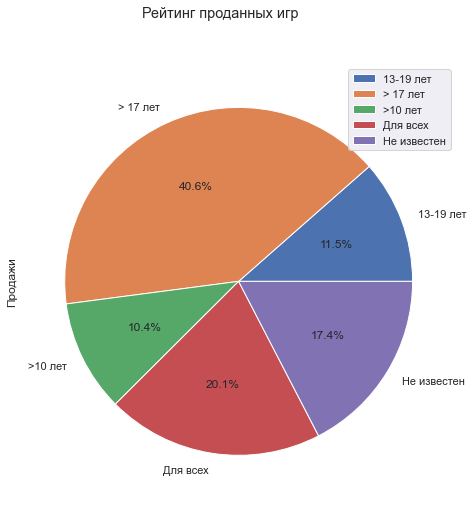

In [59]:
# найдём топ-5 платформ по продажам для ДРУГИХ стран и простоим график
data_crop.pivot_table(index='platform', values='other_sales', aggfunc=['sum'])\
.sort_values(by=('sum', 'other_sales'), ascending=False)[:5]\
.plot(kind='pie',\
      style='-',\
      subplots=True,
      title='Топ-5 платформ по ДРУГИМ странам',\
      ylabel='Продажи',\
      grid=True,\
      autopct='%1.1f%%',\
      figsize=(20,8)
);
plt.show()

# строим график по жанрам
data_crop.pivot_table(index='genre', values='other_sales', aggfunc='mean')\
.sort_values(by='other_sales', ascending=False)\
.plot(kind='bar',\
      style='-',\
      title='Популярность игровых жанров для ДРУГИХ стран',\
      xlabel='Жанры',\
      ylabel='Количество продаж',\
      grid=True,\
      figsize=(20,8)
);
plt.show()

# строим график по рейтингу
data_crop.pivot_table(index='ESRB_description', values='other_sales', aggfunc='sum')\
.plot(kind='pie',\
      style='-',\
      subplots=True,
      title='Рейтинг проданных игр',\
      ylabel='Продажи',\
      grid=True,\
      autopct='%1.1f%%',\
      figsize=(20,8)
);

Пользователь ДРУГИХ стран выбирает выбирает из платформ `PS4, PS3, X360, XOne, 3DS`. Платформы уже перечислены по популярности. 
- лидер продаж `PS4` с `35.8%` от объёма продаж игр всех представленных лидеров
- на втором месте `PS3` и `32%`
- третье `X360` и `15.1%`

Что касается топ-5 популярных жанров это `Shooter, Sports, Platform, Raсing и Action`. По рейтингу большинство продаж игр с меткой "до 17 лет"- это `40.6%`. На втором месте "игры для всех" c `20.1%`. Немного ниже игры с неизвестным рейтингом `17.4%` соответственно.

Вывод: Мы построили графики и изучили показатели. Можно утверждать, что предпочтения сильно разнятся между странами запада и пользователями из азии, вчастности Японии. Это касается как топовых платформ так и выбор жанра игр. Америку и Европу критически сильно ничто не различает как в жанрах так и в платформах. Что касается рейтинга, то большинство стран выбирают на первое место категорию "до 17 лет". У Японии больше половины игр с неизвестным рейтингом, поэтому судить о чём-то в этом сегменте сложно.

## Проверка гипотез

Настало время проверки гипотез. Проверим правда ли, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.

Нулевая гипотеза: Пользовательские рейтинги платформ равны.

Альтернативна гипотеза: Пользовательские рейтинги платформ не равны.

In [60]:
alpha = .05

results = st.ttest_ind(
    data_crop.query('platform == "XOne" and ~user_score.isna()')['user_score'], 
    data_crop.query('platform == "PC" and ~user_score.isna()')['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.2512723930221995
Не получилось отвергнуть нулевую гипотезу


Проверим правда ли, что средние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Пользовательские рейтинги платформ равны.

Альтернативна гипотеза: Пользовательские рейтинги платформ не равны.

In [61]:
alpha = .05

results = st.ttest_ind(
    data_crop.query('genre == "Action" and ~user_score.isna()')['user_score'], 
    data_crop.query('genre == "Sports" and ~user_score.isna()')['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.913439386071144e-25
Отвергаем нулевую гипотезу


Вывод: Мы проверили `2` гипотезы. В обоих проверках использовали функцию `st.ttest_ind`. В функции использовали параметр `equal_var=False` так как выыборки не равны по размеру. Испольвали отклонение в `5%`. Не взяли `1%`, так как есть самостоятельно выведеные средние значения некоторых игр. Как итог: 
- средние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») статистически значимо различаются
- средние пользовательские рейтинги платформ `Xbox One` и `PC` статистически значимо не различаются

## Общий вывод

Мы провели исследование по заказу интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Предмет задания - игры с информацией по платформам, году выпуска, оценкам пользователе и критиков и т.д. 
1. Первым делом мы подгрузили данные и сформировали таблицу, посмотрели наличие в столбцах пропусков, изобразили гистограммы и прочее, что отнисится к знакомтву с данными.


2. В начале мы подготовили данные для дальнейшего анализа, а именно:
- переименовали столбцы таблицы, выявили `269` пропусков в столбце `year_of_release`. Мы не можем из заполнить, но и не стали удалять, чтобы не потерять важные данные, которые ещё хранятся в этих строках.
- нам пришлось удалить `2` строки, где не было указано название игры так как восстановить его не может. Там же не были указаны и жанры
- в столбцах `critic_score` и `user_score` заполнили возможное количество пропусков. А так же нашли неявные дубликаты в стобце `rating` и исправили их
- в том же столбце `rating` заполнили пропуски на `unknown`. Пропусков очень много. Возможно это потому, что много игры были выпущены в разных странах, а компания ESRB это больше по Америке и Канаде.

3. В ходе, непосредственно, исследовательского анализа мы выяснили что:
- пик индустрии пришелся на `2008-2012` год
- срок жизни платформы в среднем около `10` лет
- все современные платформы падают в продажах от своих пиков, но `3DS` по продажам на `2016` год выше конкурентов она же и самая молодая платформа
- лидер в продажах игр за последние `10` лет это платформа `X360`, на втором месте `PS3`, далее `PS4`. Но если сравнивать лидеров по ярким, успешным проектам, то у `PS3` их значительно больше, чем у X360. Но PS4, которая на рынке всего `2 года`, покаывает результат чуть хуже своего предшественника `PS3`.
- но если искать лидера по продажам игры в пиковом значении то это `DS`, но с `2013` года подажи остановились, поэтому эта платформа нам не интересна как потенциальная
- `PS4` имеет на данный момент самые большие продажи `за последние 2 года` относительно всех платформ за тот же период. Пока на данный момент самая перспективная платформа
- так же мы выяснили, что у оценки критиков и количеством проданых копий игры есть прямая связь. Её можно характиризовать как "положительная слабая". Но она значительно сильнее, чем от отношение оценок пользователей
- явный лидер по продажам это жанр `Action`. На втором месте `Sports` и совсем не много от него отстаёт жанр `Misc`. А что касается игр, которые продались меньше всего, то это жанр `Strategy` и `Puzzle`. Различие про продажам с лидерами `в разы`.

4. На стадии анализа портрета пользователя по каждому представленному региону мы можем утверждать, что предпочтения сильно разнятся между странами запада и пользователями из азии, вчастности Японии. Это касается как топ-5 платформ так и выбор жанра игр. Америку и Европу критически сильно ничто не различает как в жанрах так и в платформах. Что касается рейтинга, то большинство стран выбирают на первое место категорию "до 17 лет". У Японии больше половины игр с неизвестным рейтингом, поэтому судить о чём-то в этом сегменте сложно.


5. Так же мы проверили 2 гипотезы. Как итог: 
- средние пользовательские рейтинги жанров `Action` (англ. «действие», экшен-игры) и `Sports` (англ. «спортивные соревнования») статистически значимо различаются
- средние пользовательские рейтинги платформ `Xbox One` и `PC` статистически значимо не различаются.